In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [32]:
def get_distances(x1, x2):
        return np.sqrt((x1-x2)@(x1-x2))

Mean distance algo $$MeanDis(D)=\frac{2}{m(m-1)}\Sigma^m_{i=1}\Sigma^m_{j=i+1}d_{ij}(x_i,x_j)$$

In [33]:
def _mean_distance(distance_matrix):
        dist = 0
        for i in range(distance_matrix.shape[0]):
                for j in range(i+1, distance_matrix.shape[0]):
                        dist += distance_matrix[i][j]
        return dist*2/(distance_matrix.shape[0]*(distance_matrix.shape[0]-1))

Calculate the density of each point by $$\rho_i = \Sigma^m_{j=1} f(d_{ij}-MeanDis(D))$$

In [62]:
def calculate_density(x, avgdist, clust,distmtx):
        rho_i = np.array([])
        for i in range(len(x)):
                rho0 = 0
                if clust[i]==0:
                        for j in range(len(x)):
                                # print(np.sqrt((static_properties[i]-static_properties[j])@(static_properties[i]-static_properties[j])))
                                if clust[j]==0:
                                        if distmtx[i][j] - avgdist < 0:
                                                rho0 += 1
                                        else:
                                                rho0 += 0
                rho_i = np.append(rho_i, rho0)
        return rho_i

In [68]:
def find_maximum(x, distmtx, clusters,cluster_num):
    maxi = -1
    for i in range (len(clusters)):
        if clusters[i] == cluster_num:
            if maxi == -1:
                maxi = i
            elif distmtx[x][maxi]<distmtx[x][i]:
                maxi = i
    return maxi

In [80]:
def cluster(rho, avgdist, distmtx, clusters, cluster_num):
    maximum = np.where(rho == max(rho))[0][0]
    clusters[maximum] = cluster_num
    j=0
    for i in range(len(rho)):
        if clusters[i] == 0:
            if (distmtx[maximum][i]) < avgdist:
                if j == np.round(rho.size/4):
                    maxi = find_maximum(maximum,distmtx,clusters,cluster_num)
                    if distmtx[maximum][maxi] > distmtx[maximum][i]:
                        clusters[maxi] = 0
                        clusters[i] = cluster_num
                else:
                    clusters[i] = cluster_num
                    j += 1
    print(j)


In [36]:
def get_distance_matrix(val):
        distance = np.zeros((len(val),len(val)))
        for i in range(len(val)):
                for j in range(i):
                        distance[i][j] = get_distances(val[i],val[j])
                        distance[j][i] = distance[i][j]
        return distance

Load CCD work sheet from excel

In [37]:
wb = pd.read_excel(io = 'sample.xlsx', sheet_name='5 CCD')

Load the header and data into arrays

In [38]:
headers = np.array(list(wb.columns.values))
headers = headers[~np.char.startswith(headers, 'Unnamed')]
raw_data = wb.to_numpy().transpose()

In [39]:
data = []
for i in range(len(raw_data)):
        tmp = raw_data[i]
        tmp = tmp[~pd.isna(tmp)][1:]
        if len(tmp)!=0:
            data.append(tmp)

Move the data into separate parallel 2d arrays for easy use

In [40]:
time = []
voltage = []
mAmp = []
mAmpHr = []

for i in range(int(len(data)/4)):
        time.append(data[i*4])
        voltage.append(data[i*4+1])
        mAmp.append(data[i*4+2])
        mAmpHr.append(data[i*4+3])
mAmpHr = np.array(mAmpHr)/1000

/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_31121/1213888871.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mAmpHr = np.array(mAmpHr)/1000


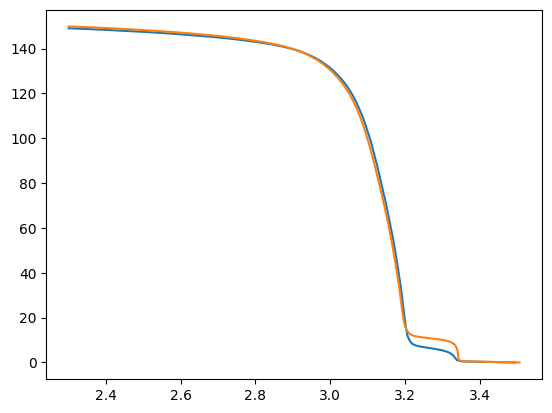

In [41]:
plt.plot(voltage[0],time[0])
plt.plot(voltage[1],time[1])

In [51]:
static_properties = np.zeros((len(headers),3))
for i in range (len(headers)):
        static_properties[i][0] = random.uniform(0.2,1.0)
        static_properties[i][1] = voltage[i][0]
        static_properties[i][2] = mAmpHr[i][len(mAmpHr[i])-1]

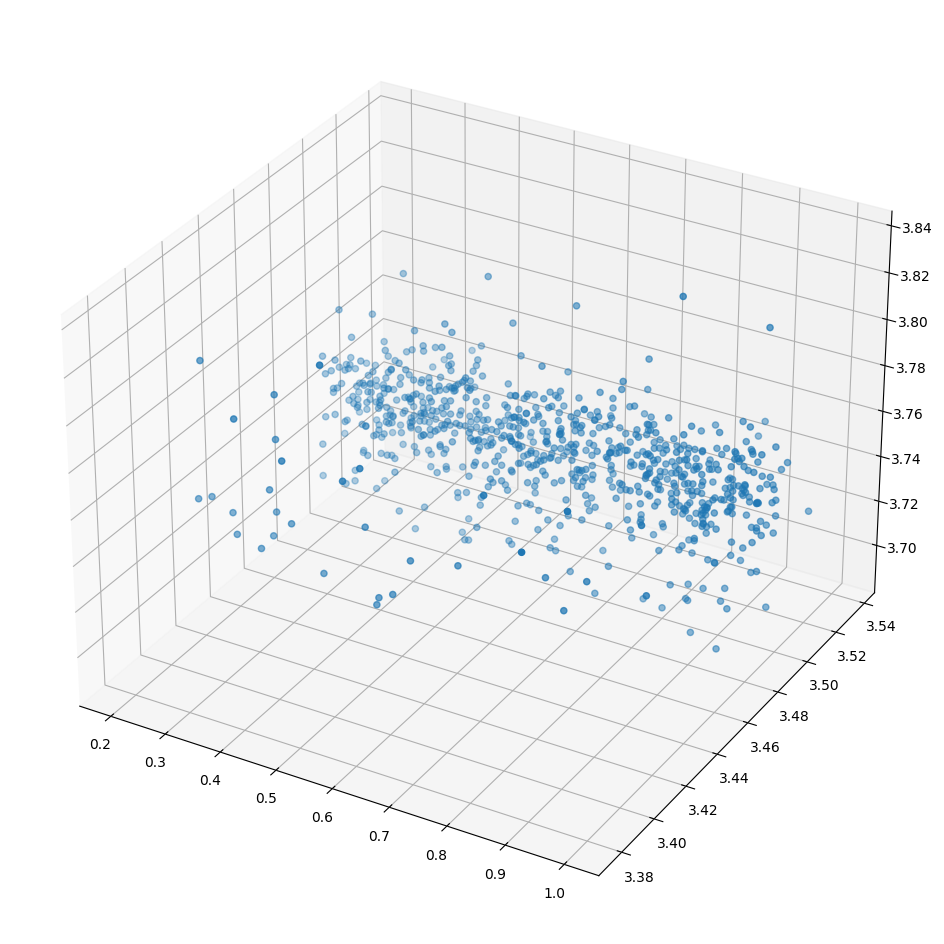

In [52]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
a = static_properties.transpose()
ax.scatter(a[0], a[1], a[2])
plt.show()

In [58]:
distmtx = get_distance_matrix(static_properties)
averagedist = _mean_distance(distmtx)
print(averagedist)

0.26867824560091436


In [81]:
clusters = np.zeros(int(static_properties.size/3))
i=1
while len(np.where(clusters == 0.0)[0])!=0:
        rho = calculate_density(static_properties,averagedist,clusters,distmtx)
        cluster(rho,averagedist,distmtx,clusters,i)
        i+=1

202
202
202
119
76


806


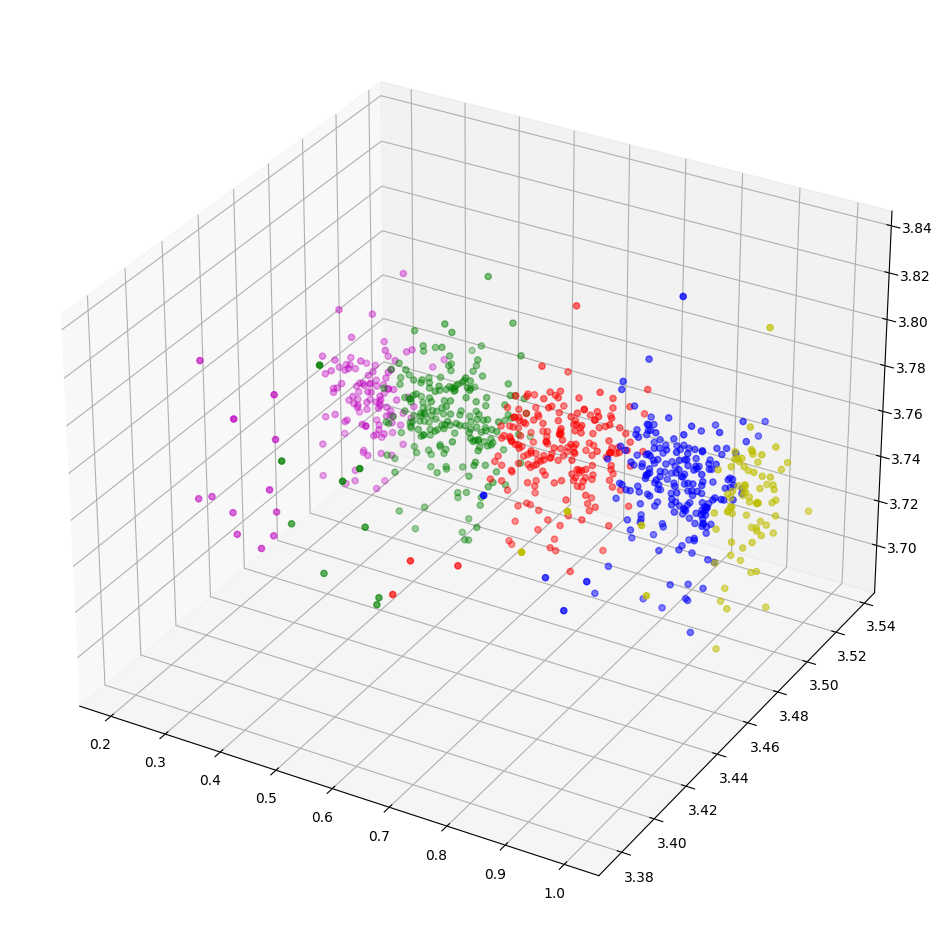

In [82]:
color = []
print(len(clusters))
for i in range(len(clusters)):
        if clusters[i] == 1:
            color.append('r')
        if clusters[i] == 2:
            color.append('g')
        if clusters[i] == 3:
            color.append('b')
        if clusters[i] == 4:
            color.append('m')
        if clusters[i] == 5:
            color.append('y')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
a = static_properties.transpose()
ax.scatter(a[0], a[1], a[2],color=color)
plt.show()